<a href="https://colab.research.google.com/github/udan2006/Telco_Customer_churn/blob/main/ML_CW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Telecom Churn Analysis

This CourseWork is required to perfome binary classification on the telco customer churn dataset to predict customer churn. There are 3 tasks,

Task 1 - Exploratory Data Anlysis (EDA)

Task 2 - Model implementation


1.   Decision Tree
2.   Neural Network based Model


* Conduct all necessary data preprocessing, hyperparameter tuning, and evaluation using appropriate metrics.

*  Compare both models clearly, showing experimental results



Task 3 - AI Ethics









In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn import datasets
from sklearn.metrics import classification_report, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import confusion_matrix
from psutil import boot_time
from sklearn.metrics import confusion_matrix


import tensorflow as tf
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

## Load Dataset from github

In [43]:
df = pd.read_csv("https://raw.githubusercontent.com/udan2006/Telco_Customer_churn/refs/heads/main/Telco-Customer-Churn.csv")
df.shape

(7043, 21)

### **View dataset**

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


### **Dataset Information**

In [5]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
#Get unique values for each column
df.apply(lambda x: x.unique())

,0
customerID,"[7590-VHVEG, 5575-GNVDE, 3668-QPYBK, 7795-CFOC..."
gender,"[Female, Male]"
SeniorCitizen,"[0, 1]"
Partner,"[Yes, No]"
Dependents,"[No, Yes]"
tenure,"[1, 34, 2, 45, 8, 22, 10, 28, 62, 13, 16, 58, ..."
PhoneService,"[No, Yes]"
MultipleLines,"[No phone service, No, Yes]"
InternetService,"[DSL, Fiber optic, No]"
OnlineSecurity,"[No, Yes, No internet service]"


## Exploratory Data Analysis (EDA)

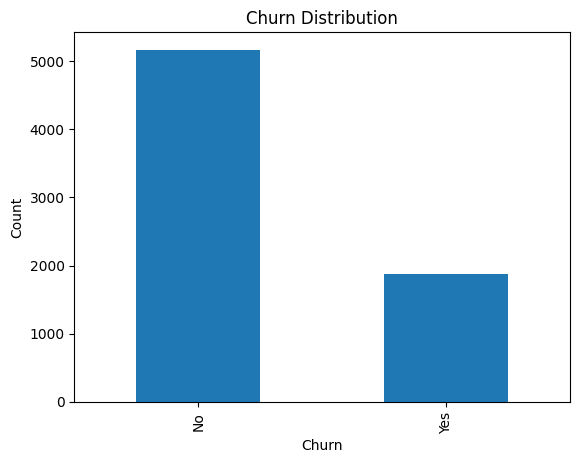

In [44]:
# Churn Distribution
df['Churn'].value_counts().plot(kind="bar")
plt.title("Churn Distribution")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()

In [ ]:
df['Churn'].value_counts(normalize=True)*100

### **Analysis Numerical data**

In [67]:
num_features = ['tenure', 'MonthlyCharges']

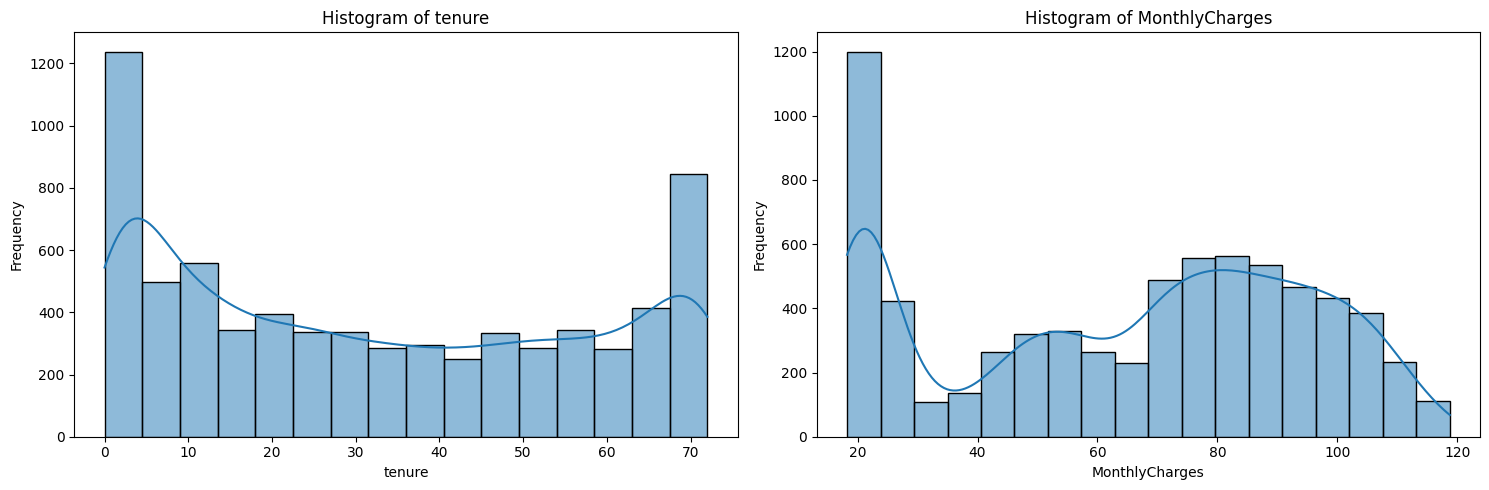

In [69]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
for i, feature in enumerate(num_features):
    sns.histplot(df[feature], kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

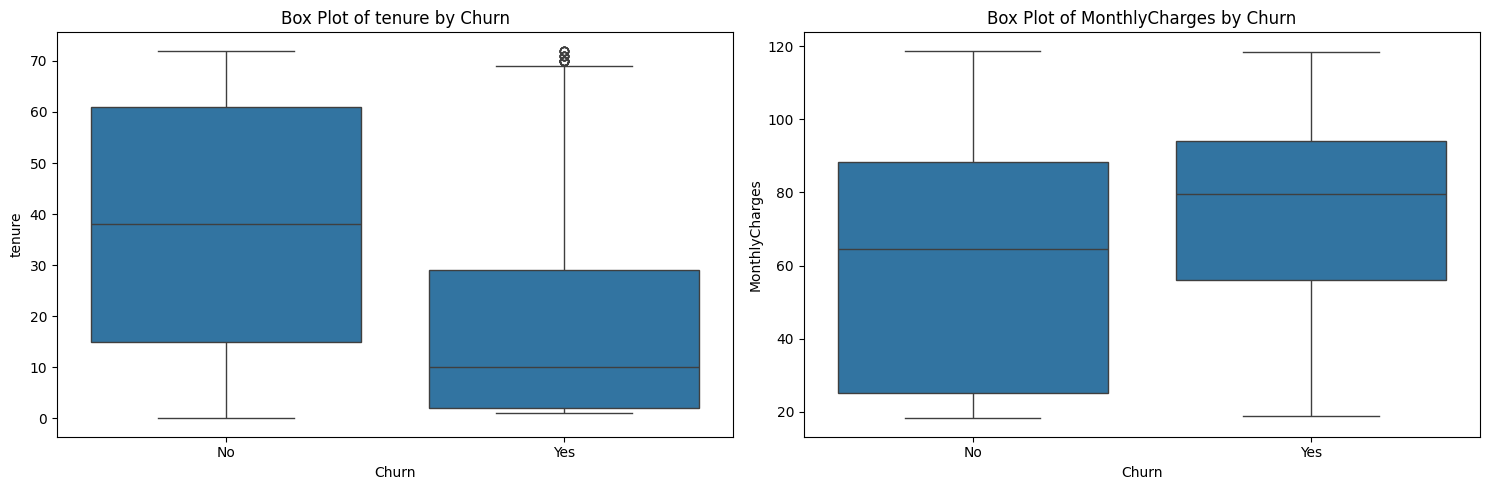

In [101]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
for i, feature in enumerate(num_features):
    sns.boxplot(x='Churn', y=feature, data=df, ax=axes[i])
    axes[i].set_title(f'Box Plot of {feature} by Churn')
    axes[i].set_xlabel('Churn')
    axes[i].set_ylabel(feature)
plt.tight_layout()
plt.show()

### **Analysis Categorical data**

In [57]:
cat_features = [
    'gender', 'Partner', 'Dependents',
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod'
]

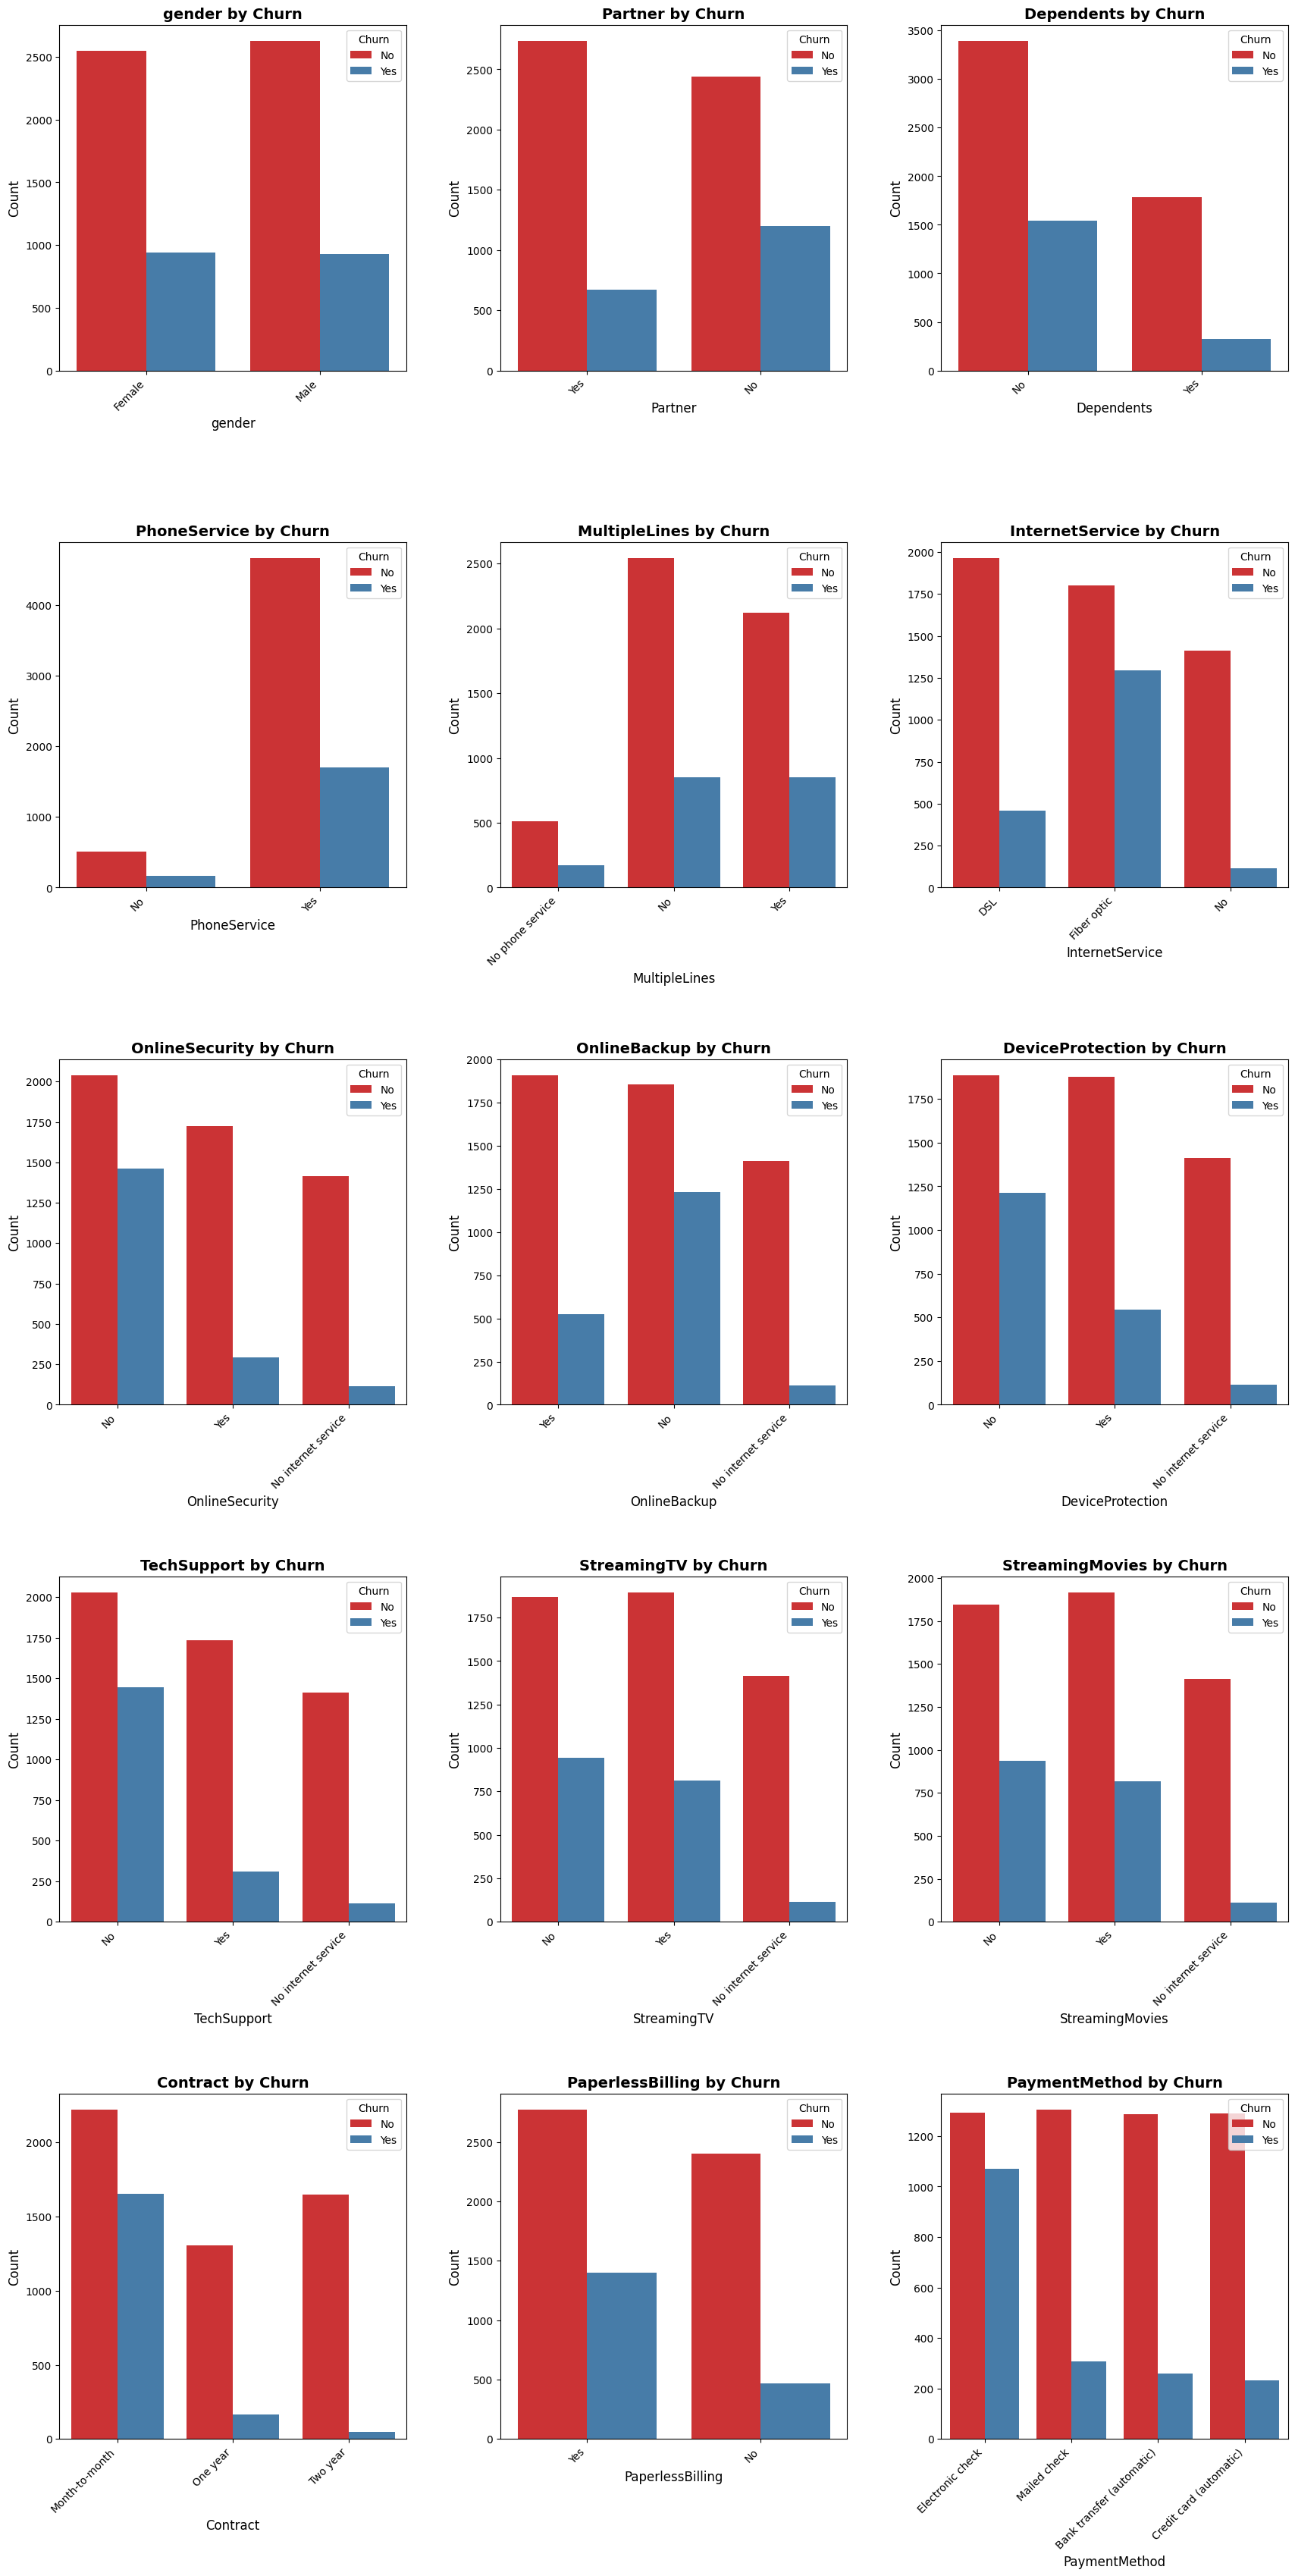

In [58]:
plt.figure(figsize=(18, 40))

for i, col in enumerate(cat_features, 1):
    plt.subplot(6, 3, i)
    sns.countplot(data=df, x=col, hue='Churn', palette='Set1')
    plt.title(f'{col} by Churn', fontsize=14, fontweight='bold')
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Churn')

plt.tight_layout(pad=4.0)
plt.show()

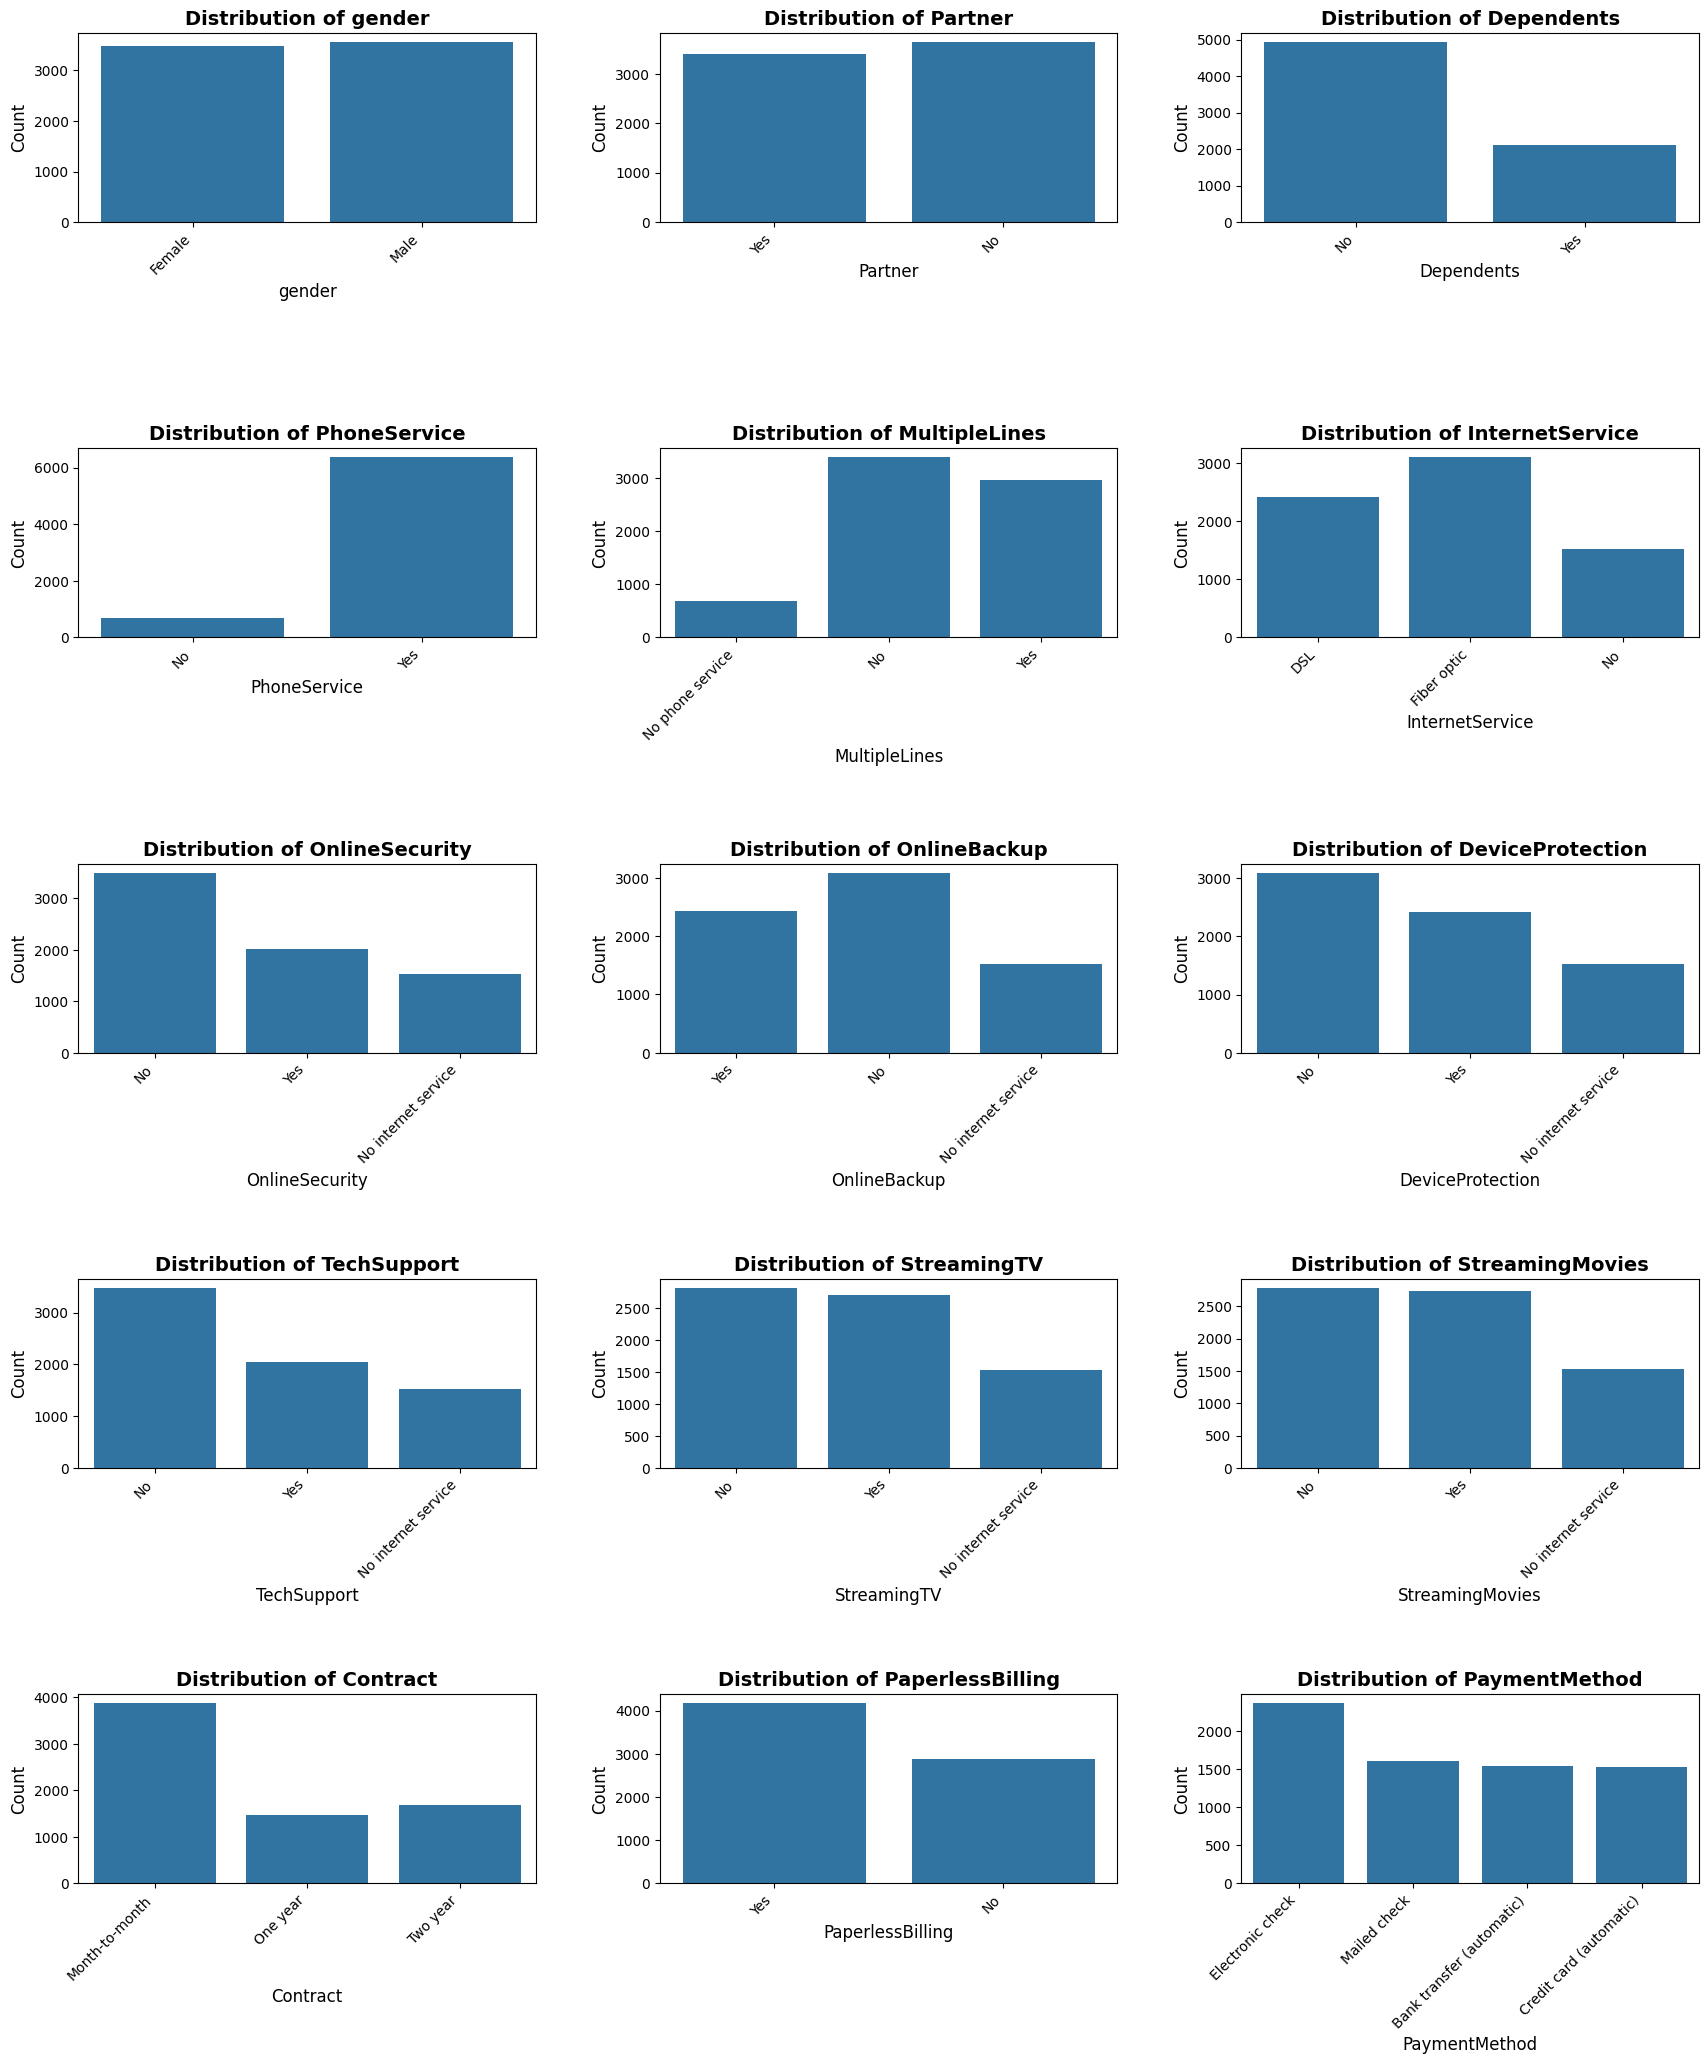

In [64]:
plt.figure(figsize=(18, 24))
for i, col in enumerate(cat_features, 1):
    plt.subplot(6, 3, i)
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}', fontsize=14, fontweight='bold')
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=45, ha='right')
plt.tight_layout(pad=4.0)
plt.show()

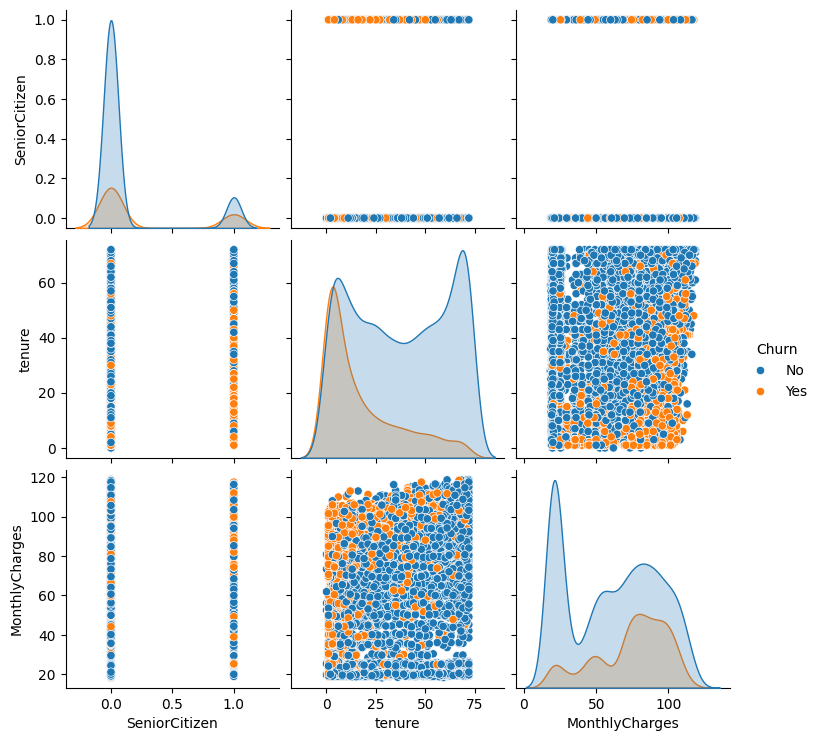

In [18]:
sns.pairplot(df, hue='Churn')
plt.show()

## Data Cleaning and preprocessing

### **Data Cleaning**

In [19]:
df.duplicated().sum()

np.int64(0)

In [20]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


**Convert to numerical values**



In [21]:
#totalCharges convert to the numeric

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.loc[df['tenure'] == 0, 'TotalCharges'] = 0

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [23]:
df.corr(numeric_only=True)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,0.220173,0.103006
tenure,0.016567,1.000000,0.247900,0.826178
MonthlyCharges,0.220173,0.247900,1.000000,0.651174
TotalCharges,0.103006,0.826178,0.651174,1.000000


### **Correlation Heatmap**



<Axes: >

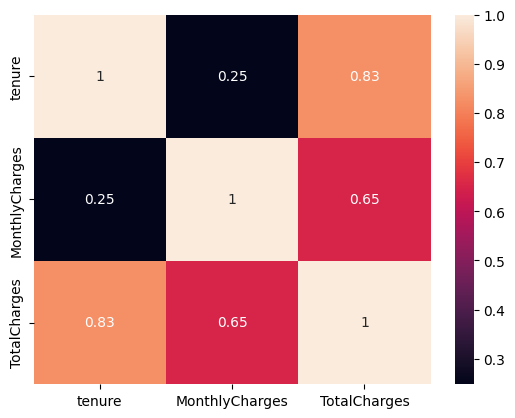

In [24]:
corr = df[['tenure', 'MonthlyCharges', 'TotalCharges']].corr()
sns.heatmap(corr, annot=True)

### **Data PreProcessing**

**Drop Unnecessary Columns**

In [25]:
df = df.drop(['customerID'], axis=1)

In [26]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**Binary Encoding**

In [27]:
binary = ['gender', 'Partner','Dependents','PhoneService','PaperlessBilling']
for feature in binary:
    df[feature] = df[feature].map({'Yes': 1, 'No': 0,'Male': 0, 'Female': 1})

In [28]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   object 


**One-Hot Encoding for Multi-class Categorical Features**

In [30]:
multi_class_features = ['Contract', 'PaymentMethod', 'InternetService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
df = pd.get_dummies(df, columns=multi_class_features,drop_first=True)

In [31]:
df.apply(lambda x: x.unique())

,0
gender,"[1, 0]"
SeniorCitizen,"[0, 1]"
Partner,"[1, 0]"
Dependents,"[0, 1]"
tenure,"[1, 34, 2, 45, 8, 22, 10, 28, 62, 13, 16, 58, ..."
PhoneService,"[0, 1]"
PaperlessBilling,"[1, 0]"
MonthlyCharges,"[29.85, 56.95, 53.85, 42.3, 70.7, 99.65, 89.1,..."
TotalCharges,"[29.85, 1889.5, 108.15, 1840.75, 151.65, 820.5..."
Churn,"[0, 1]"


**Feature Scaling**

In [32]:
feature_scaling = ['tenure', 'MonthlyCharges', 'TotalCharges']
scaler = MinMaxScaler()
df[feature_scaling] = scaler.fit_transform(df[feature_scaling])

**Separate data into features**

In [33]:
X = df.drop('Churn', axis=1)
Y = df['Churn']

In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=42,)

SMORT use for handle classs imbalance

In [35]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_res, Y_train_res = sm.fit_resample(X_train, Y_train)

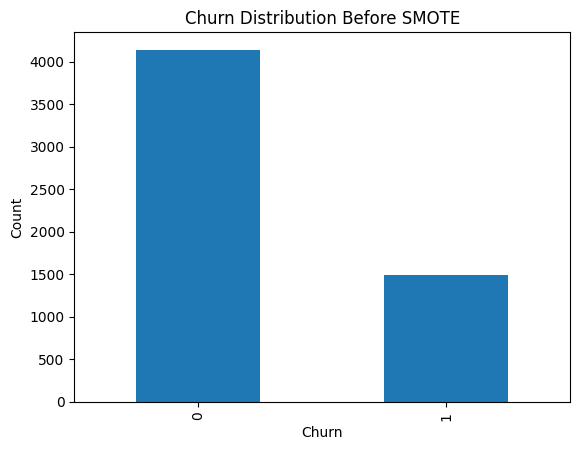

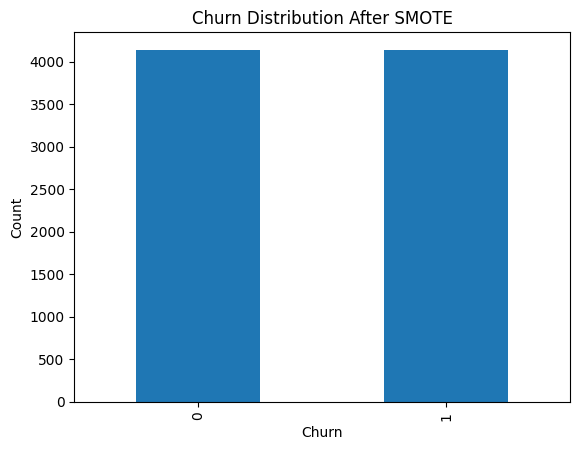

In [36]:
Y_train.value_counts().plot(kind='bar')
plt.title("Churn Distribution Before SMOTE")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()

Y_train_res.value_counts().plot(kind='bar')
plt.title("Churn Distribution After SMOTE")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()

## Decision Tree

### BaseLine Decision tree

In [37]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_res, Y_train_res)

DecisionTreeClassifier(random_state=42)

In [38]:
prediction_test = dt.predict(X_test)
accuracy_score(Y_test, prediction_test)

0.7217885024840313

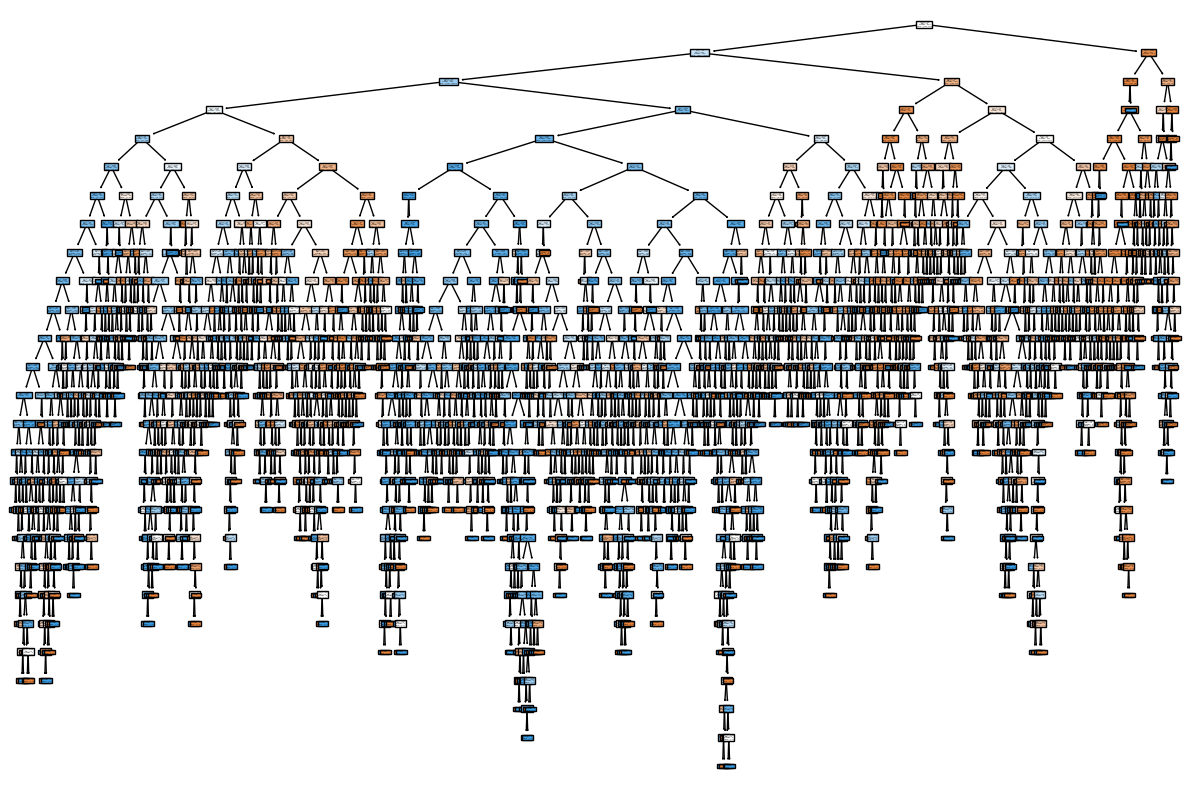

In [39]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(dt,filled=True)
plt.show()

### Pruning tuning for Decision tree

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

# Get pruning alphas
path = dt.cost_complexity_pruning_path(X_train_res, Y_train_res)
ccp_alphas = path.ccp_alphas

In [71]:
models = []

for alpha in ccp_alphas:
    pruned_tree = DecisionTreeClassifier(random_state=42, ccp_alpha=alpha)
    pruned_tree.fit(X_train_res, Y_train_res)
    models.append(pruned_tree)

In [72]:
# Evaluate all pruned models

train_acc = []
test_acc  = []
test_auc  = []

for model in models:
    train_acc.append(accuracy_score(Y_train_res, model.predict(X_train_res)))
    test_acc.append(accuracy_score(Y_test, model.predict(X_test)))
    y_prob = model.predict_proba(X_test)[:,1]
    test_auc.append(roc_auc_score(Y_test, y_prob))

In [73]:
# Select best model
best_index = test_auc.index(max(test_auc))

print("Best alpha:", ccp_alphas[best_index])
print("Train Accuracy:", train_acc[best_index])
print("Test Accuracy :", test_acc[best_index])
print("ROC AUC:", test_auc[best_index])

Best alpha: 0.0009635267364539951
Train Accuracy: 0.7765828902851619
Test Accuracy : 0.7459190915542938
ROC AUC: 0.8461964453921558


In [74]:
best_pruning_tree = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alphas[best_index])
best_pruning_tree.fit(X_train_res, Y_train_res)

DecisionTreeClassifier(ccp_alpha=np.float64(0.0009635267364539951),
                       random_state=42)

### Evaluate Decision tree model

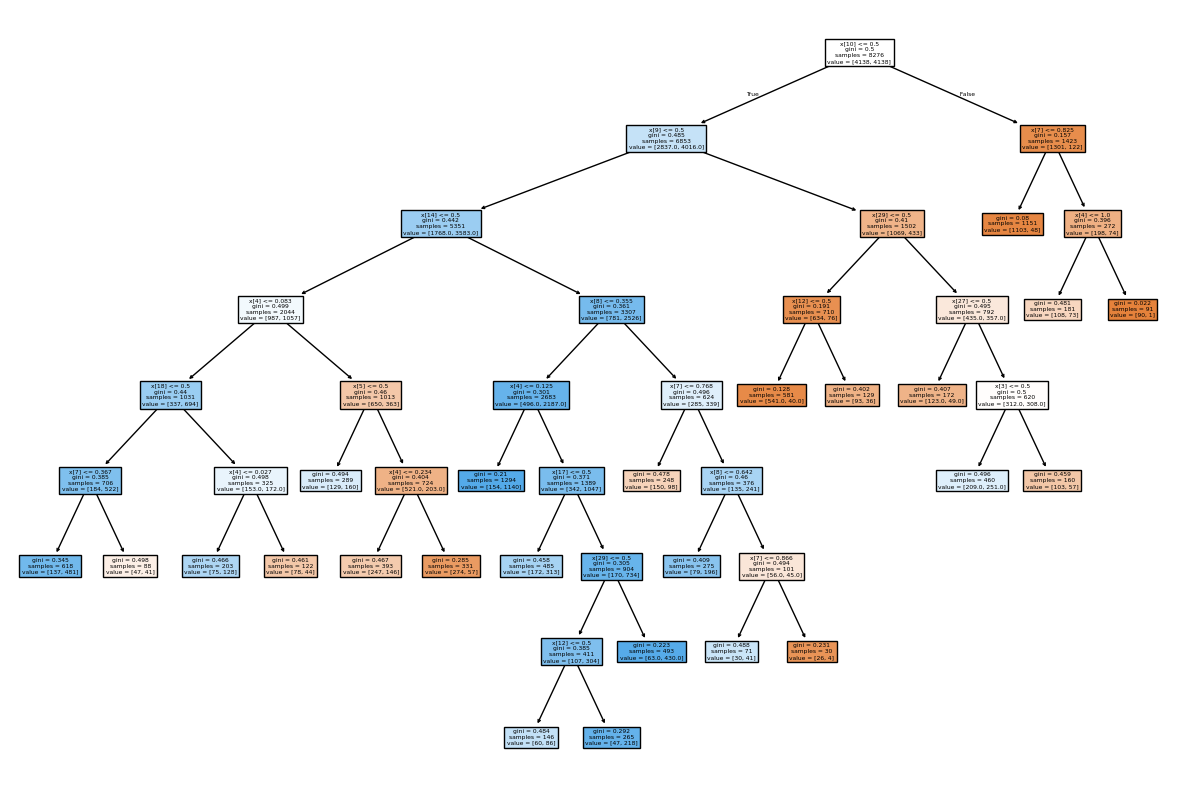

In [75]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(best_pruning_tree,filled=True)
plt.show()

In [76]:
Y_prob = best_pruning_tree.predict_proba(X_test)[:, 1]

In [77]:
y_pred_class = best_pruning_tree.predict(X_test)
y_test_series = pd.Series(y_pred_class)
print(y_test_series.value_counts())

0    824
1    585
Name: count, dtype: int64


In [78]:
fpr_dt, tpr_dt, thresholds_dt = roc_curve(Y_test,Y_prob)

In [79]:
auc_score_dt = auc(fpr_dt,tpr_dt)
auc_score_dt

np.float64(0.8461964453921558)

In [80]:
def plot_roc_curve(fpr, tpr):
    plt.figure(figsize=(7,5))
    plt.plot(fpr_dt, tpr_dt, color='orange', label='AUC = %0.2f' % auc_score_dt)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

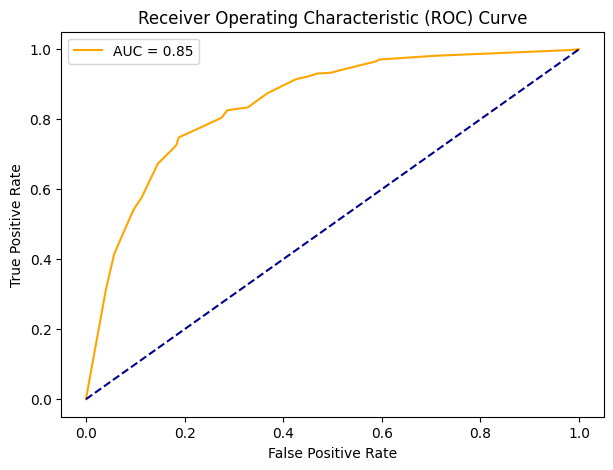

In [81]:
plot_roc_curve(fpr_dt,tpr_dt)

In [82]:
confusion_matrix(Y_test, y_pred_class)

array([[751, 285],
       [ 73, 300]])

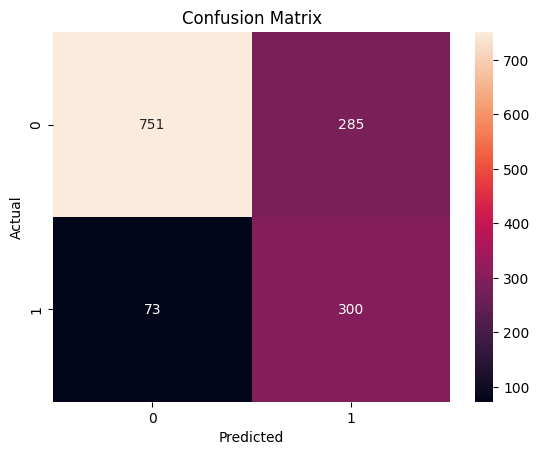

In [83]:
sns.heatmap(confusion_matrix(Y_test, y_pred_class), annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [84]:
print(classification_report(Y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.91      0.72      0.81      1036
           1       0.51      0.80      0.63       373

    accuracy                           0.75      1409
   macro avg       0.71      0.76      0.72      1409
weighted avg       0.81      0.75      0.76      1409



## Neural Network

### BaseLine Neural Network

In [85]:
seed = 42
tf.random.set_seed(seed)
random.seed(seed)

def build_model (input_shape_1):
  model = Sequential([
      Dense(128, activation='relu', input_shape=input_shape_1),
      BatchNormalization(),
      Dropout(0.3),

      Dense(64, activation='relu'),
      BatchNormalization(),
      Dropout(0.2),

      Dense(32, activation='relu'),
      BatchNormalization(),
      Dropout(0.1),

      Dense(1, activation='sigmoid')
  ])
  return model

input_shape_1 = (X_train.shape[1],)

model_2 = build_model(input_shape_1)
model_2.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model_2.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         3,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,233 (59.50 KB)

 Trainable params: 14,785 (57.75 KB)

 Non-trainable params: 448 (1.75 KB)

In [86]:
stop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

X_train_final, X_val,Y_train_final, Y_val = train_test_split(X_train_res, Y_train_res, test_size=0.2, random_state=42)

history = model_2.fit(
    X_train_final, Y_train_final,
    epochs=100,
    batch_size=64,
    validation_data=(X_val, Y_val),
    callbacks=[stop],
    verbose=1
)

Epoch 1/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6402 - loss: 0.6998 - val_accuracy: 0.7554 - val_loss: 0.5542
Epoch 2/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7414 - loss: 0.5374 - val_accuracy: 0.7651 - val_loss: 0.5084
Epoch 3/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7676 - loss: 0.4928 - val_accuracy: 0.7675 - val_loss: 0.4823
Epoch 4/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7660 - loss: 0.4925 - val_accuracy: 0.7681 - val_loss: 0.4747
Epoch 5/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7617 - loss: 0.4816 - val_accuracy: 0.7808 - val_loss: 0.4682
Epoch 6/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7731 - loss: 0.4674 - val_accuracy: 0.7814 - val_loss: 0.4680
Epoch 7/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7845 - loss: 0.4641 - val_accuracy: 0.7826 - val_loss: 0.4699
Epoch 8/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7825 - loss: 0.4619 - val_accu

In [87]:
val_loss, val_accuracy = model_2.evaluate(X_val, Y_val, verbose=0)
print("Validation Accuracy:", val_accuracy)


Validation Accuracy: 0.7977052927017212


### Install keras tuner

In [88]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 kB 2.9 MB/s eta 0:00:00


### Keras tuner for Neural Network Model

In [89]:
import keras_tuner as kt
seed = 42
tf.random.set_seed(seed)
random.seed(seed)

def build_model(hp):
    model = Sequential()


    model.add(Dense(
        units=hp.Int('units_1', min_value=128, max_value=512, step=64),
        activation='relu',
        input_shape=(X_train_final.shape[1],)
    ))
    model.add(BatchNormalization())
    model.add(Dropout(rate=hp.Float('dropout_1', min_value=0.1, max_value=0.5, step=0.1)))


    model.add(Dense(
        units=hp.Int('units_2', min_value=64, max_value=256, step=32),
        activation='relu'
    ))
    model.add(BatchNormalization())
    model.add(Dropout(rate=hp.Float('dropout_2', min_value=0.1, max_value=0.4, step=0.1)))


    if hp.Boolean('add_third_layer'):
        model.add(Dense(
            units=hp.Int('units_3', min_value=32, max_value=128, step=32),
            activation='relu'
        ))
        model.add(BatchNormalization())
        model.add(Dropout(rate=hp.Float('dropout_3', min_value=0.1, max_value=0.3, step=0.1)))


    model.add(Dense(1, activation='sigmoid'))


    learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 5e-4, 1e-4])
    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model

In [90]:
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=6,
    executions_per_trial=1,
    directory='kt_dir',
    project_name='ann_tuning'
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [91]:
stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

tuner.search(
    X_train_final, Y_train_final,
    epochs=100,
    validation_data=(X_val, Y_val),
    callbacks=[stop],
    batch_size=64
)

Trial 6 Complete [00h 00m 36s]
val_accuracy: 0.8079710006713867

Best val_accuracy So Far: 0.8121980428695679
Total elapsed time: 00h 03m 39s


In [92]:
best_model = tuner.get_best_models(num_models=1)[0]
best_hp = tuner.get_best_hyperparameters(num_trials=1)[0]

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [93]:
val_loss, val_accuracy = best_model.evaluate(X_val, Y_val, verbose=0)
print("Validation Accuracy:", val_accuracy)

Validation Accuracy: 0.8121980428695679


### Evaluate Neural Network tuning model

In [94]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score

y_val_pred_prob = best_model.predict(X_val).ravel()
y_val_pred = (y_val_pred_prob > 0.5).astype(int)

print("\nClassification Report:")
print(classification_report(Y_val, y_val_pred))

print("F1 Score (class 1):", f1_score(Y_val, y_val_pred))
print("Recall (class 1):", recall_score(Y_val, y_val_pred))


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.75      0.80       830
           1       0.77      0.88      0.82       826

    accuracy                           0.81      1656
   macro avg       0.82      0.81      0.81      1656
weighted avg       0.82      0.81      0.81      1656

F1 Score (class 1): 0.8235961429381735
Recall (class 1): 0.8789346246973365


Confusion Matrix:
[[619 211]
 [100 726]]


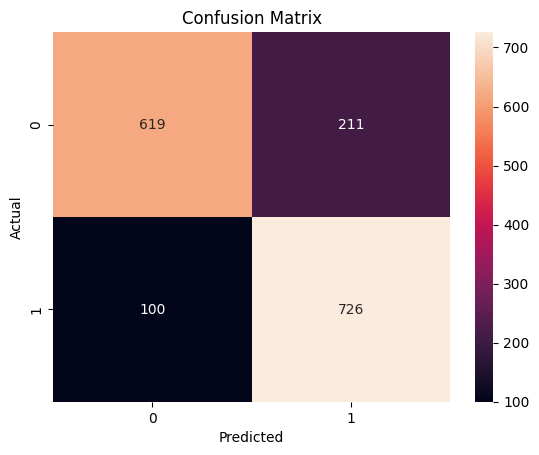

In [95]:
print("Confusion Matrix:")
print(confusion_matrix(Y_val, y_val_pred))

sns.heatmap(confusion_matrix(Y_val, y_val_pred), annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [96]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

fpr_nn, tpr_nn, thresholds = roc_curve(Y_val, y_val_pred_prob)
roc_auc = auc(fpr_nn, tpr_nn)


In [97]:
def plot_roc_curve(fpr, tpr):
    plt.figure(figsize=(7,5))
    plt.plot(fpr_nn, tpr_nn, color='blue', label='AUC = %0.2f' % roc_auc)
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

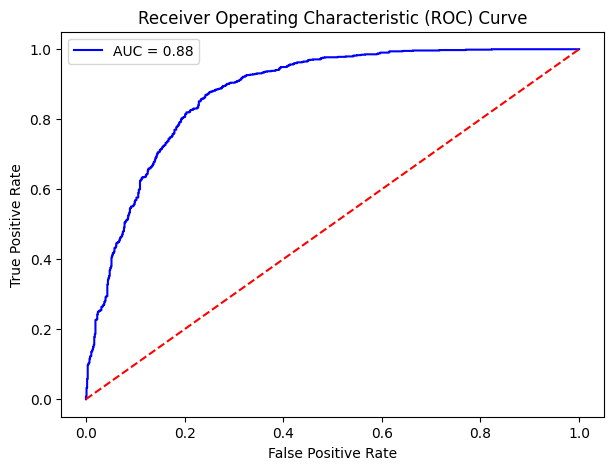

In [98]:
plot_roc_curve(fpr_nn,tpr_nn)

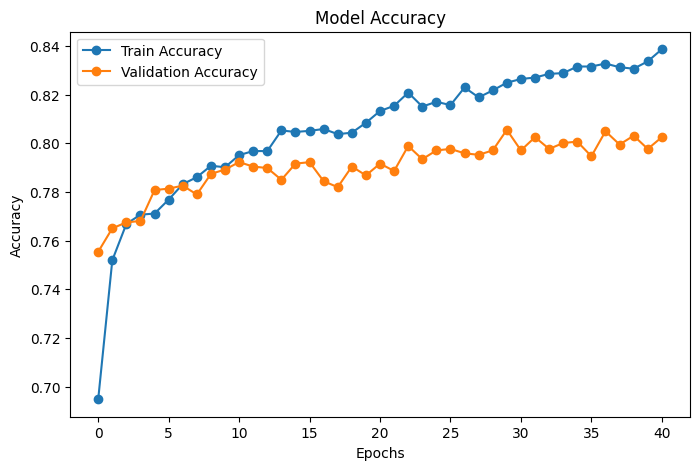

In [99]:
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


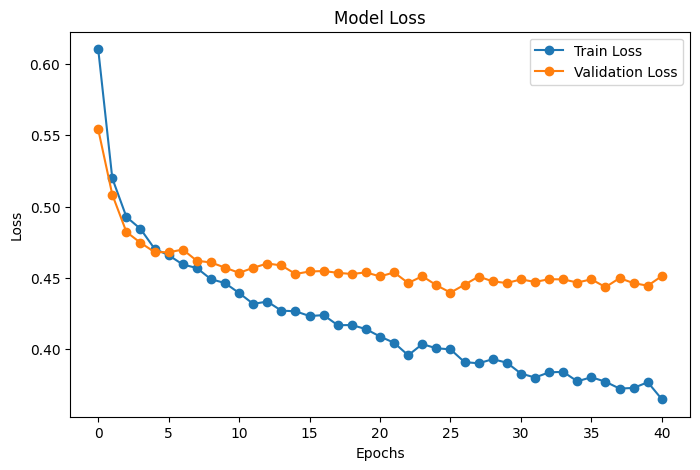

In [100]:
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()